# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.073431e+01     7.521685e+00
 * time: 0.0014400482177734375
     1     2.919640e+01     6.602897e+00
 * time: 0.0051119327545166016
     2     1.886460e+01     5.389405e+00
 * time: 0.009463071823120117
     3     1.401023e+01     3.025799e+00
 * time: 0.01347804069519043
     4     1.205892e+01     4.425317e+00
 * time: 0.06945610046386719
     5     1.167590e+01     4.661065e+00
 * time: 0.07263493537902832
     6     9.731111e+00     1.778163e+00
 * time: 0.0761101245880127
     7     8.815032e+00     1.138716e+00
 * time: 0.07932710647583008
     8     8.548245e+00     8.321094e-01
 * time: 0.08266806602478027
     9     8.508624e+00     1.242785e+00
 * time: 0.08522605895996094
    10     8.462725e+00     1.111323e+00
 * time: 0.08785510063171387
    11     8.432281e+00     7.738235e-01
 * time: 0.09058189392089844
    12     8.348717e+00     6.229525e-01
 * time: 0.09407496452331543
    13     8.263526e+00     5.672817e-01
 * t

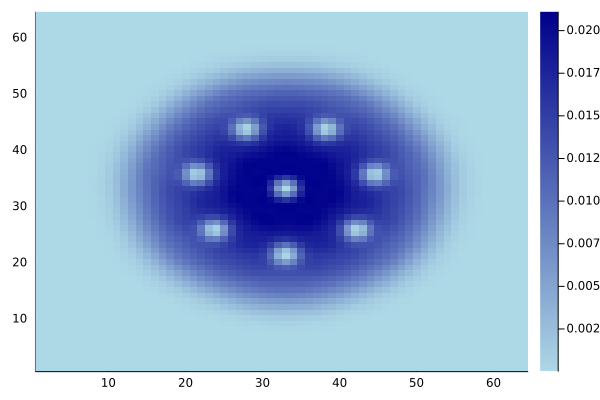

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)